### Logistic Regression Training Script
#### Author: Austin Fernandez
#### Date Modified: April 25, 2020

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train, y_train = extract_data("TrainingSet (Labeled Only).csv")
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

(246, 327)
(246, 324)
(246,)


In [3]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(456, 324) (456,)
(456, 324) (456,)


In [ ]:
# LogisticRegression, RandomizedSearch
random_search_iterations = 100
k_folds = 5
rand_seed = 3249807

parameters = {
    'penalty':['l1','l2'], 
    'C': uniform(loc=0,scale=4),
    'fit_intercept' : [True,False],
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [100,200,300,400,500]
}
mnb = LogisticRegression()
random_search_logreg = RandomizedSearchCV(mnb, parameters,cv=k_folds,\
                                          n_iter=random_search_iterations,\
                                          random_state=rand_seed)

In [ ]:
print_res("Vanilla",x_train,y_train,random_search_logreg)

In [ ]:
print_res("Random Oversampling",x_os,y_os,random_search_logreg)

In [ ]:
print_res("SMOTE",x_smote,y_smote,random_search_logreg)

In [ ]:
# MLPClassifier, RandomizedSearch
random_search_iterations = 200
k_folds = 5
rand_seed = 3249807

parameters = {
    'activation':['logistic', 'tanh', 'relu'], 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha': [1 / np.power(10,x) for x in range(1,10)],
    'batch_size' : [min(200,int(np.power(2,i))) for i in range(4,8)],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [100,200,300,400,500],
    'shuffle' : [True,False],
    'momentum' : uniform(loc=0.2,scale=0.8),
    'nesterovs_momentum' : [True,False],
    'early_stopping' : [True,False]
}
mlp = MLPClassifier()
random_search_mlp = RandomizedSearchCV(mlp, parameters,cv=k_folds,\
                                       n_iter=random_search_iterations,\
                                       random_state=rand_seed, n_jobs=-1)

In [ ]:
print_res("Vanilla",x_train,y_train,random_search_mlp)

In [ ]:
print_res("Random Oversampling",x_os,y_os,random_search_mlp)

In [ ]:
print_res("SMOTE",x_smote,y_smote,random_search_mlp)

In [4]:
# SGDClassifier, RandomizedSearch
random_search_iterations = 200
k_folds = 5
rand_seed = 3249807

parameters = {
    'loss' : [ 'hinge', 'log', 'modified_huber', 'squared_hinge', \
              'perceptron', 'squared_loss', 'huber', \
              'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha': [1 / np.power(10,x) for x in range(1,10)],
    'l1_ratio': uniform(loc=0,scale=1),
    'fit_intercept' : [True, False],
    'max_iter' : [100,200,300,400,500],
    'shuffle' : [True, False],
    'eta0' : uniform(loc=0.01,scale=0.99),
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'early_stopping' : [True, False],
    'warm_start' : [True, False],
    'average' : [True,False]
}
sgdc = SGDClassifier()
random_search_sgdc = RandomizedSearchCV(sgdc, parameters,cv=k_folds,\
                                        n_iter=random_search_iterations,\
                                        random_state=rand_seed, n_jobs=-1)

Vanilla:
Best Score: 0.3416
alpha => 1e-05
average => True
early_stopping => True
eta0 => 0.05010230091623275
fit_intercept => False
l1_ratio => 0.9253620646171374
learning_rate => invscaling
loss => huber
max_iter => 300
penalty => elasticnet
shuffle => True
warm_start => False
Splits: 5
Accuracy: 41.8699%


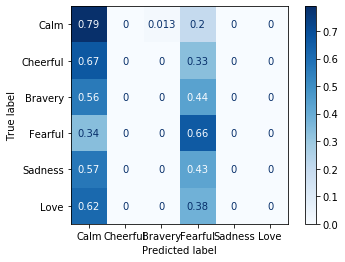

In [5]:
print_res("Vanilla",x_train,y_train,random_search_sgdc)

Random Oversampling:
Best Score: 0.5570
alpha => 1e-07
average => False
early_stopping => False
eta0 => 0.9075245383241642
fit_intercept => True
l1_ratio => 0.03529543330654061
learning_rate => adaptive
loss => modified_huber
max_iter => 400
penalty => l1
shuffle => True
warm_start => True
Splits: 5
Accuracy: 72.1491%


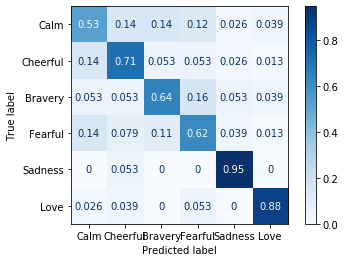

In [6]:
print_res("Random Oversampling",x_os,y_os,random_search_sgdc)

SMOTE:
Best Score: 0.5726
alpha => 1e-07
average => False
early_stopping => False
eta0 => 0.9075245383241642
fit_intercept => True
l1_ratio => 0.03529543330654061
learning_rate => adaptive
loss => modified_huber
max_iter => 400
penalty => l1
shuffle => True
warm_start => True
Splits: 5
Accuracy: 74.5614%


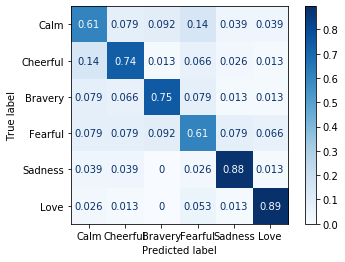

In [7]:
print_res("SMOTE",x_smote,y_smote,random_search_sgdc)